In [2]:
## Cloud label comparison
import sage_data_client
import duckdb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_lidar = sage_data_client.query(
    start="-192h", 
    filter={
        "plugin": "registry.sagecontinuum.org/rjackson/weather-classification:1.3.5.*",
        "vsn": "W0BE"
    }
)
df_lidar = df_lidar.set_index("timestamp")

In [4]:
df_cloud = sage_data_client.query(
    start="-192h", 
    filter={
        "plugin": "registry.sagecontinuum.org/seonghapark/cloud-cover:0.1.3",
        "vsn": "W0BE"
    }
)
df_cloud = df_cloud.set_index("timestamp")

In [9]:
duckdb.query("SELECT value FROM df_lidar WHERE name = 'weather.classifier.class'").to_df()

,value
0,1
1,1
2,0
3,1
4,1
...,...
238,1
239,1
240,0
241,1


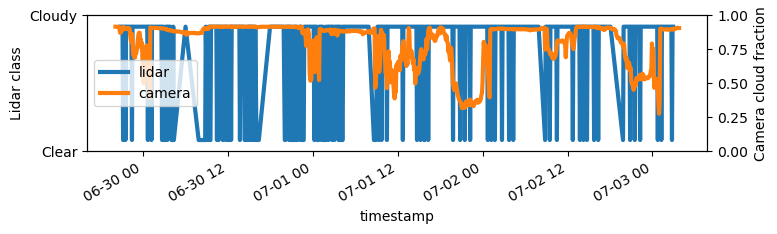

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 2))
ax3 = ax.twinx()
df_lidar["value"][df_lidar["name"] == "weather.classifier.class"].plot(
    ax=ax, label="lidar", linewidth=3)
df_cloud["value"][df_cloud["name"] == "env.coverage.cloud"].plot(
    ax=ax, label="camera", linewidth=3)
ax.legend()
ax.set_ylabel("Lidar class")
ax.set_yticks([-0.1, 1.1])
ax.set_yticklabels(["Clear", "Cloudy"])
ax3.set_ylabel("Camera cloud fraction")
fig.savefig('Comparison.png')

<Axes: xlabel='timestamp'>

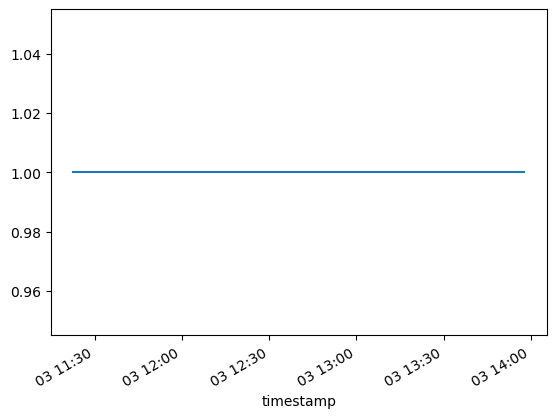

In [6]:
df_lidar["value"][df_lidar["name"] == "weather.classifier.class"].plot(label="lidar")

In [ ]:
df_lidar = sage_data_client.query(
    start="-12h", 
    filter={
        "plugin": "registry.sagecontinuum.org/rjackson/:1.3.5.*",
        "vsn": "W0BE"
    }
)
df_lidar = df_lidar.set_index("timestamp")